In [87]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [88]:
os.environ["CUDA_DIR"] = "C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDNN\\v9.1"

In [89]:
# load, average and merge sensor samples
data_dir = '../data/ERC2023/'
train = pd.DataFrame()
train = pd.read_csv('../data/ERC2023/data_set_AG_1.csv')

# for filename in os.listdir(data_dir):
#     dataset = pd.read_csv(os.path.join(data_dir, filename), sep='\t')
#     dataset_mean_abs = np.array(dataset.abs().mean())
#     dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
#     dataset_mean_abs.index = [filename]
#     # train = train.append(dataset_mean_abs)
#     train = pd.concat([train, dataset_mean_abs])
    
# train.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']
# #train.head()

In [90]:
train

,type,sender,to,approveAmount,transferAmount,transferFromAmount,oldApproveState,newApproveState,oldBalanceState,newBalanceState,success
0,transferFrom,0xa4c9a75fee195537bb69a7a176d308af348a4333,0xdd39328a2ffe0c7bc368cc00429f3cecd58a277d,0.000000e+00,0.000000e+00,2.470000e+09,2.470000e+09,0.000000e+00,7.050000e+09,4.580000e+09,True
1,transfer,0x6b95f1248f1dd0b27bf3b8cc7fa42bcb4c055807,0x5e27253b2799b0ab9e34683a31493ea8bddf2c0d,0.000000e+00,2.030000e+09,0.000000e+00,5.350000e+09,5.350000e+09,1.366000e+10,1.163000e+10,True
2,transferFrom,0x29cf0fd60915fb5e1a5580f37ccafb7943f0724a,0x32e056bc2befccd905228ce145503b0021564e25,0.000000e+00,0.000000e+00,8.390000e+09,8.570000e+09,1.800000e+08,1.452000e+10,6.130000e+09,True
3,transferFrom,0x34572c56ae4fffa97c82cdf4659d07887ce21e8a,0x8efea814f08197f9916fc015ac1906f7b85f6070,0.000000e+00,0.000000e+00,9.700000e+09,9.430000e+09,9.430000e+09,1.381000e+10,1.381000e+10,False
4,approve,0x5164d5783e6ee3b1a56e89a811c64be212a8dd56,0x6209db592f07fe1b29f7d16be6ede2b5f6776d94,4.620000e+09,0.000000e+00,0.000000e+00,7.970000e+09,1.259000e+10,1.393000e+10,1.393000e+10,True
...,...,...,...,...,...,...,...,...,...,...,...
995,transfer,0x971d6906faeabccb4d7d2ebb0227a6f0fc651a70,0x97e7aacc34620ace256e5e18f1e3eeffc6753ce3,0.000000e+00,5.970000e+09,0.000000e+00,8.020000e+09,8.020000e+09,7.790000e+09,1.820000e+09,True
996,transfer,0x335dd914f0a81bb439ff07bd5dac9b5dd72e4269,0x19df7263353926b3217b19177ae7a2ce87712cb6,0.000000e+00,2.790000e+09,0.000000e+00,5.320000e+09,5.320000e+09,6.940000e+09,4.150000e+09,True
997,transferFrom,0xc52eb62ba32967d839988d7cc9106184e0e4d865,0xaabad07f79f5b4df6fa46ee0cec7a338e03dbd3a,0.000000e+00,0.000000e+00,4.620000e+09,5.210000e+09,5.900000e+08,5.050000e+09,4.300000e+08,True
998,approve,0x692e57c5adeb53936adbd35fc9a407a87b6cedd3,0x575f11528e63d74bb28c1c992901ec7c2ad1daff,4.640000e+09,0.000000e+00,0.000000e+00,7.940000e+09,1.258000e+10,8.040000e+09,8.040000e+09,True


In [91]:
# from_cumm = dict()
# print(from_cumm)


In [92]:
type_replace = {"transfer": float(0), "transferFrom": float(1), "approve": float(2)}
train_type_replaced = train.replace(type_replace)

C:\Users\nikit\AppData\Local\Temp\ipykernel_15828\1789823958.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_type_replaced = train.replace(type_replace)


In [93]:
train_type_replaced.dtypes

type                  float64
sender                 object
to                     object
approveAmount         float64
transferAmount        float64
transferFromAmount    float64
oldApproveState       float64
newApproveState       float64
oldBalanceState       float64
newBalanceState       float64
success                  bool
dtype: object

In [94]:
train = train_type_replaced.drop(columns=['to', 'sender'], axis=1)

In [95]:
train

,type,approveAmount,transferAmount,transferFromAmount,oldApproveState,newApproveState,oldBalanceState,newBalanceState,success
0,1.0,0.000000e+00,0.000000e+00,2.470000e+09,2.470000e+09,0.000000e+00,7.050000e+09,4.580000e+09,True
1,0.0,0.000000e+00,2.030000e+09,0.000000e+00,5.350000e+09,5.350000e+09,1.366000e+10,1.163000e+10,True
2,1.0,0.000000e+00,0.000000e+00,8.390000e+09,8.570000e+09,1.800000e+08,1.452000e+10,6.130000e+09,True
3,1.0,0.000000e+00,0.000000e+00,9.700000e+09,9.430000e+09,9.430000e+09,1.381000e+10,1.381000e+10,False
4,2.0,4.620000e+09,0.000000e+00,0.000000e+00,7.970000e+09,1.259000e+10,1.393000e+10,1.393000e+10,True
...,...,...,...,...,...,...,...,...,...
995,0.0,0.000000e+00,5.970000e+09,0.000000e+00,8.020000e+09,8.020000e+09,7.790000e+09,1.820000e+09,True
996,0.0,0.000000e+00,2.790000e+09,0.000000e+00,5.320000e+09,5.320000e+09,6.940000e+09,4.150000e+09,True
997,1.0,0.000000e+00,0.000000e+00,4.620000e+09,5.210000e+09,5.900000e+08,5.050000e+09,4.300000e+08,True
998,2.0,4.640000e+09,0.000000e+00,0.000000e+00,7.940000e+09,1.258000e+10,8.040000e+09,8.040000e+09,True


In [96]:
train.dtypes

type                  float64
approveAmount         float64
transferAmount        float64
transferFromAmount    float64
oldApproveState       float64
newApproveState       float64
oldBalanceState       float64
newBalanceState       float64
success                  bool
dtype: object

In [97]:
# # transform data file index to datetime and sort in chronological order
# train.index = pd.to_datetime(train.index, format='%Y.%m.%d.%H.%M.%S')
# train = train.sort_index()
# train.to_csv('Averaged_BearingTest_Dataset.csv')
# print("Dataset shape:", train.shape)
train.head()

,type,approveAmount,transferAmount,transferFromAmount,oldApproveState,newApproveState,oldBalanceState,newBalanceState,success
0,1.0,0.000000e+00,0.000000e+00,2.470000e+09,2.470000e+09,0.000000e+00,7.050000e+09,4.580000e+09,True
1,0.0,0.000000e+00,2.030000e+09,0.000000e+00,5.350000e+09,5.350000e+09,1.366000e+10,1.163000e+10,True
2,1.0,0.000000e+00,0.000000e+00,8.390000e+09,8.570000e+09,1.800000e+08,1.452000e+10,6.130000e+09,True
3,1.0,0.000000e+00,0.000000e+00,9.700000e+09,9.430000e+09,9.430000e+09,1.381000e+10,1.381000e+10,False
4,2.0,4.620000e+09,0.000000e+00,0.000000e+00,7.970000e+09,1.259000e+10,1.393000e+10,1.393000e+10,True


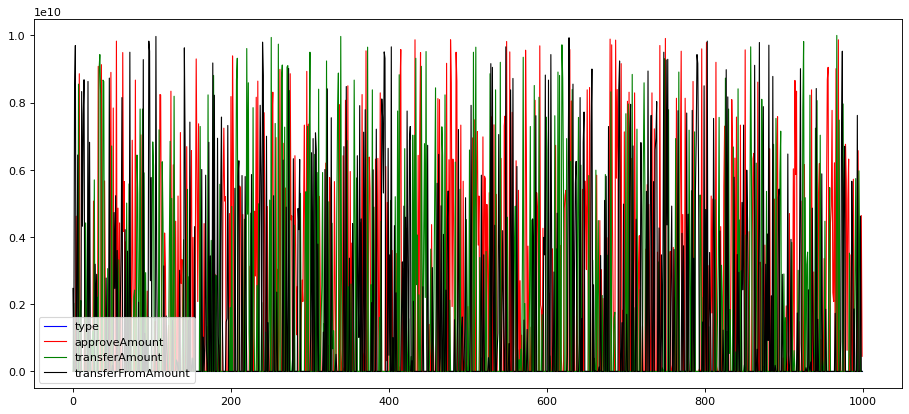

In [98]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train['type'], label='type', color='blue', animated = True, linewidth=1)
ax.plot(train['approveAmount'], label='approveAmount', color='red', animated = True, linewidth=1)
ax.plot(train['transferAmount'], label='transferAmount', color='green', animated = True, linewidth=1)
ax.plot(train['transferFromAmount'], label='transferFromAmount', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
# ax.set_title('Bearing Sensor Training Data', fontsize=16)
plt.show()

In [99]:
# transforming data from the time domain to the frequency domain using fast Fourier transform
# train_fft = np.fft.fft(train)


In [100]:
# fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
# ax.plot(train_fft[:,0].real, label='Bearing 1', color='blue', animated = True, linewidth=1)
# ax.plot(train_fft[:,1].imag, label='Bearing 2', color='red', animated = True, linewidth=1)
# ax.plot(train_fft[:,2].real, label='Bearing 3', color='green', animated = True, linewidth=1)
# ax.plot(train_fft[:,3].real, label='Bearing 4', color='black', animated = True, linewidth=1)
# plt.legend(loc='lower left')
# ax.set_title('Bearing Sensor Training Frequency Data', fontsize=16)
# plt.show()

In [101]:
# normalize the data

from sklearn.preprocessing import MinMaxScaler
import joblib
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
# X_test = scaler.transform(test)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [102]:
X_train.shape

(1000, 9)

In [103]:
def generate_sequence(data, sequence_length):
	seq_data = []
	# print(seq_data)
	for i in range(len(data)- sequence_length+1):
		seq = data[ i : i+sequence_length ]
		# print(seq)
		seq_data.append(seq)

	# print(seq_data)
	return np.array(seq_data)

In [104]:
SEQUENCE_LENGTH = 1

a = generate_sequence(X_train, SEQUENCE_LENGTH)

In [105]:
X_train.shape

(1000, 9)

In [106]:
print(a.shape)

(1000, 1, 9)


In [107]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Input, Dense, RepeatVector, TimeDistributed
CuDNNLSTM = LSTM

In [108]:
model = Sequential()
model.add(Input(shape=(a.shape[1], a.shape[2])))
model.add(CuDNNLSTM(64, return_sequences=True  ))
model.add(CuDNNLSTM(SEQUENCE_LENGTH, return_sequences=False ))
model.add(Dense(SEQUENCE_LENGTH))
model.add(RepeatVector(SEQUENCE_LENGTH))
model.add(CuDNNLSTM(SEQUENCE_LENGTH, return_sequences=True ))
model.add(CuDNNLSTM(64, return_sequences=True  ))
model.add(TimeDistributed(Dense(a.shape[2])))

In [109]:
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 1, 64)          │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 1)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 1, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 1, 1)           │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 1, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 1, 9)           │           585 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,703 (143.37 KB)

 Trainable params: 36,703 (143.37 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
history = model.fit(a, a, epochs=3, batch_size=1, validation_split=0.05, ).history

Epoch 1/3
950/950 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2715 - val_loss: 0.1785
Epoch 2/3
950/950 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1787 - val_loss: 0.1398
Epoch 3/3
950/950 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1551 - val_loss: 0.1296


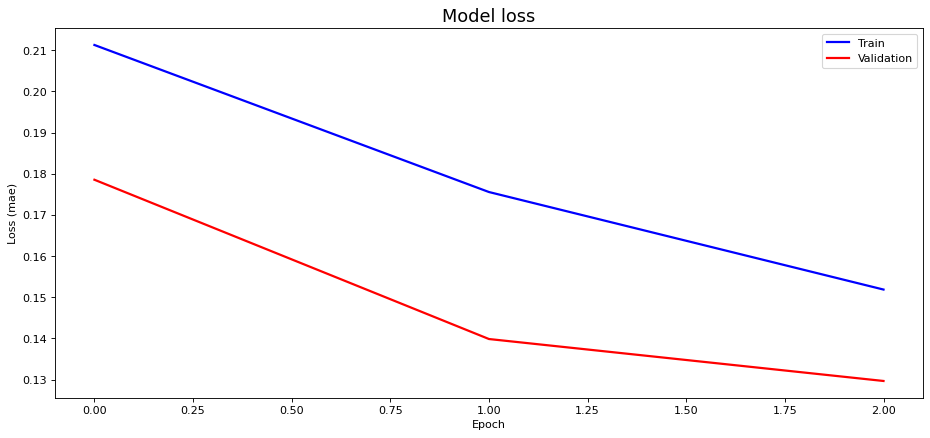

In [111]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [112]:
test = pd.read_csv('../data/ERC2023/data_set_MAL_1.csv')

In [113]:
test_type_replaced = test.replace(type_replace)

C:\Users\nikit\AppData\Local\Temp\ipykernel_15828\3389839284.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_type_replaced = test.replace(type_replace)


In [114]:
test_type_replaced.dtypes

type                  float64
sender                 object
to                     object
approveAmount         float64
transferAmount        float64
transferFromAmount    float64
oldApproveState       float64
newApproveState       float64
oldBalanceState       float64
newBalanceState       float64
success                  bool
dtype: object

In [115]:
test = test_type_replaced.drop(columns=['to', 'sender'], axis=1)

In [116]:
test.dtypes

type                  float64
approveAmount         float64
transferAmount        float64
transferFromAmount    float64
oldApproveState       float64
newApproveState       float64
oldBalanceState       float64
newBalanceState       float64
success                  bool
dtype: object

In [117]:
X_test = scaler.transform(test)

In [118]:
X_test.shape

(1000, 9)

In [119]:
b = generate_sequence(X_test, SEQUENCE_LENGTH)

In [120]:
print(b.shape)

(1000, 1, 9)


In [121]:
b_pred = model.predict(b)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step 


In [122]:
b.shape

(1000, 1, 9)

In [123]:
b_pred.shape

(1000, 1, 9)

In [124]:
loss = np.mean(np.abs(b_pred-b), axis = 1)

In [125]:
loss.shape

(1000, 9)

In [126]:
combined_loss_b = np.sum(loss, axis=1)

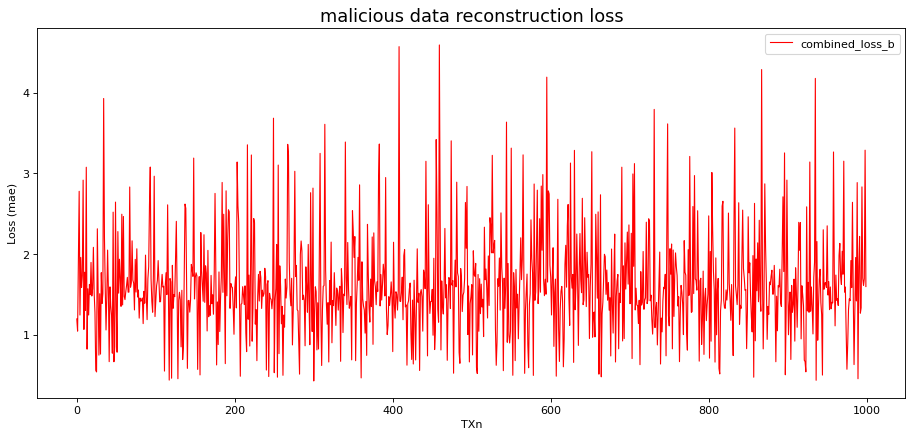

In [127]:
# natural numbering of the bearings
# BEARINGNUMBER = 1
# BEARINGNUMBER_WHOLE = BEARINGNUMBER - 1
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)

ax.plot(combined_loss_b, 'r', label=f'combined_loss_b', linewidth=1)

ax.set_title('malicious data reconstruction loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('TXn')
ax.legend(loc='upper right')
# plt.ylim(0, 1)
plt.show()

In [128]:
a_pred = model.predict(a)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [129]:
loss_a = np.mean(np.abs(a_pred - a), axis = 1)

In [130]:
combined_loss_a = np.sum(loss_a, axis=1)

In [131]:
# loss_a[:, 1]

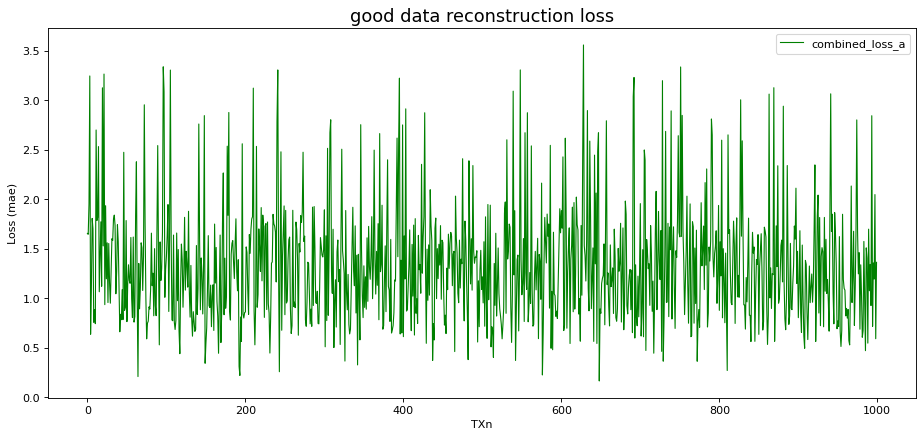

In [132]:
# natural numbering of the bearings
# BEARINGNUMBER = 1
# BEARINGNUMBER_WHOLE = BEARINGNUMBER - 1
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)

ax.plot(combined_loss_a, 'g', label=f'combined_loss_a', linewidth=1)

ax.set_title('good data reconstruction loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('TXn')
ax.legend(loc='upper right')
# plt.ylim(0, 1)
plt.show()

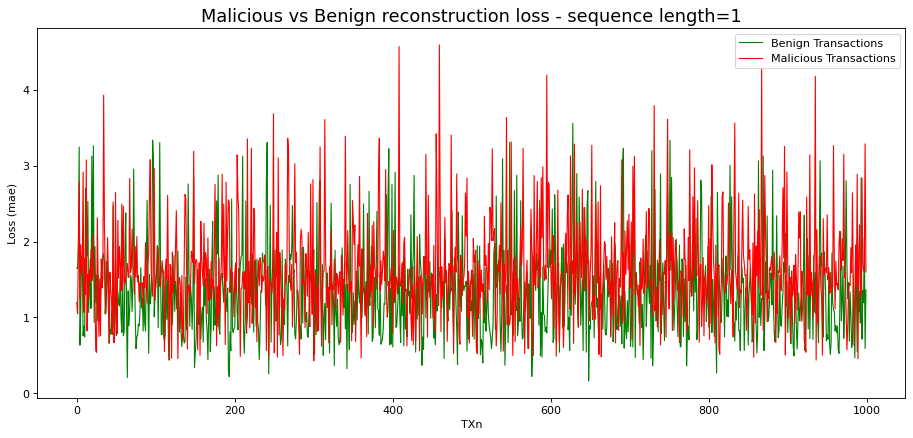

In [133]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)

ax.plot(combined_loss_a, 'g', label=f'Benign Transactions', linewidth=1)
ax.plot(combined_loss_b, 'r', label=f'Malicious Transactions', linewidth=1)

ax.set_title('Malicious vs Benign reconstruction loss - sequence length=1', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('TXn')
ax.legend(loc='upper right')
# plt.ylim(0, 1)
plt.show()